Šah
==

Šah je strateška igra na ploči za dva igrača. Razvila se od indijske igre _chaturanga_ u sedmom stoljeću te zadobila moderni oblik i pravila u Europi u 15. stoljeću. Danas pravila turnirskog šaha propisuje Svjetska šahovska federacija (FIDE).\
U nastavku teksta pretpostavlja se da je čitatelj upoznat s osnovnim pravilima igre (u suprotnom, može pogledati priloženi video).

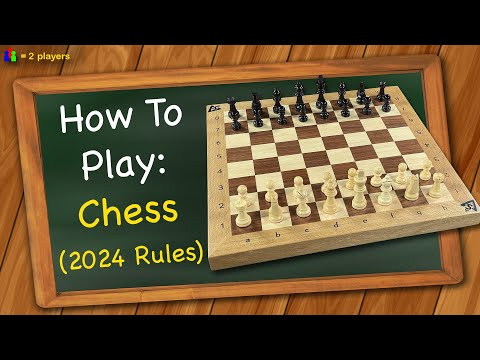

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('iPXcfS0UDlI')

Za prikaz šahovske ploče, koristimo Pythonov library `python-chess`. Osim toga upotrebljavamo biblioteke Numpy, Pandas i Matplotlib.

In [2]:
pip install chess

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 16.1 MB/s eta 0:00:000:00:010:00:01
  Preparing metadata (setup.py) ... one
  Created wheel for chess: filename=chess-1.11.2-py3-none-any.whl size=147847 sha256=6c314bd105fde56d019fd9d6e2aa902abdcc4aa0d525bc88266d2a5cb6a035da
  Stored in directory: /home/student1/norberd/.cache/pip/wheels/83/1f/4e/8f4300f7dd554eb8de70ddfed96e94d3d030ace10c5b53d447
Successfully built chess
Note: you may need to restart the kernel to use updated packages.


In [129]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [130]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [131]:
import chess
import io, chess.pgn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

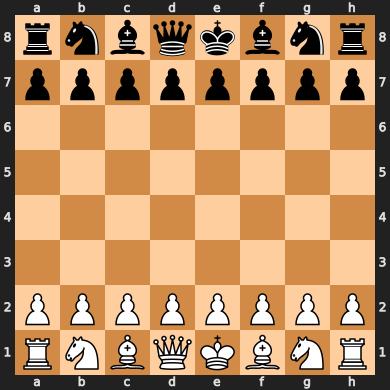

In [1]:
board = chess.Board()
board

Šahovska ploča sastoji se od 8 redaka označenih brojevima 1-8 te 8 stupaca označenih slovima a-h, pomoću kojih bilježimo polja. Na primjer, u početnoj poziciji, bijela dama je na polju d1, a crni kralj na e8.
Jedan potez sastoji se od pomicanja figure od strane oba igrača. Poteze bilježimo tzv. algebarskom notacijom, koristeći simbol za figuru te zapis polja na koji se pomiče, prvo za bijelog, a zatim za crnog igrača. Slova koja simboliziraju figure su sljedeća:
* K - kralj (king)
* Q - dama (queen)
* R - top (rook)
* B - lovac (bishop)
* N - skakač (knight).

Pješaci nemaju poseban simbol. Malu rohadu (na kraljevoj strani) označavamo s 0-0, a veliku (na daminoj strani) s 0-0-0. \
Ako figura daje šah, to označavamo s **+**, a ako daje mat s **#**.

Zapišimo primjerice najbrži mogući mat:
1. g4 e5
2. f3 Qh4#

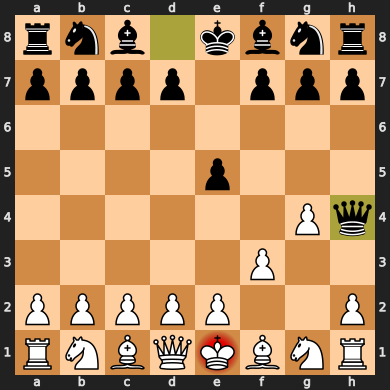

In [2]:
board.push_san("g4")
board.push_san("e5")
board.push_san("f3")
board.push_san("Qh4")
board

In [3]:
board.is_checkmate()

True

Tipična šahovska partija sastoji se od tri dijela: otvaranja, središnjice i završnice.

### Otvaranje

Otvaranje šahovske partije odvija se tijekom prvih 12 poteza. Neki od glavnih ciljeva otvaranja su:
1. zauzimanje centra: kontroliranje polja e4, d4, e5 i d5, s pješacima ili figurama.
2. razvoj figura: uključivanje skakača i lovaca u igru.
3. rohada: micanje kralja iz centra i uvođenje topa u igru.

In [4]:
def italian():
    pgn = io.StringIO("1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5 4. 0-0 Nf6 5. d3 0-0")
    game = chess.pgn.read_game(pgn)
    return game

In [163]:
def moveList(game):
    moves=[]
    for move in game.mainline_moves():
        moves.append(move)
    return moves

In [164]:
def play(board,moves):
    if moves:
        board.push(moves[0])
        del(moves[0])
    return board

Evo primjera pozicije koja bi mogla nastati u otvaranju.

In [7]:
board = chess.Board()
moves = moveList(italian())

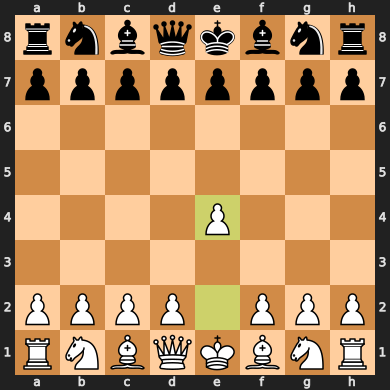

In [8]:
play(board,moves)

Teorija otvaranja vrlo je široka i dobro razvijena grana šaha, koja proučava moguće varijante i poteze u otvaranju. Većina otvaranja koja se igra na visokoj razini ima dodjeljeno ime po državi ili igraču koji ga je razvio. Otvaranje na ploči gore je varijanta tzv. talijanke.

Iz baze podataka dostupne na [chessgames.com](chessgames.com) dobivamo statistiku za moguće početne poteze, igrane u majstorskim partijama od 15. stoljeća do danas.

In [137]:
start = pd.read_csv('start.txt', sep=r"\t\s*", engine='python')
start

,potez,broj partija,bijeli dobiva,remi,crni dobiva
0,1. e4,"843,172",37.6%,32.5%,29.9%
1,1. d4,"624,840",37.5%,35.4%,27%
2,1. Nf3,"168,442",37.1%,37.9%,25.1%
3,1. c4,"129,019",38%,36.1%,25.9%
4,1. g3,"12,397",37.8%,35.4%,26.8%
5,1. f4,"6,780",33.2%,24.7%,42.1%
6,1. b3,"6,672",37.2%,29.5%,33.3%
7,1. Nc3,"2,816",38.1%,25.4%,36.5%
8,1. b4,"1,685",31.9%,22.8%,45.2%
9,1. e3,878,33.5%,20.6%,45.9%


Primjećujemo da je svih 20 mogućnosti za prvi potez (16 poteza pješacima i 4 skakačima) igrano u nekoj partiji te da najčešće igrani potezi (e4, d4, Nf3, c4) slijede osnovni princip zauzimanja centra.

In [135]:
#pomocna funkcija za pretvaranje stringovnih u brojevne podatke
def numeric(data):
    if(data['bijeli dobiva'].dtype!='float64'):
        data['bijeli dobiva'] = data['bijeli dobiva'].str.replace("%","")
        data['remi'] = data['remi'].str.replace("%","")
        data['crni dobiva'] = data['crni dobiva'].str.replace("%","")
        
        data['bijeli dobiva'] = pd.to_numeric(data['bijeli dobiva'])
        data['remi'] = pd.to_numeric(data['remi'])
        data['crni dobiva'] = pd.to_numeric(data['crni dobiva'])

    return data

In [143]:
start = numeric(start)
start

,potez,broj partija,bijeli dobiva,remi,crni dobiva
0,1. e4,"843,172",37.6,32.5,29.9
1,1. d4,"624,840",37.5,35.4,27.0
2,1. Nf3,"168,442",37.1,37.9,25.1
3,1. c4,"129,019",38.0,36.1,25.9
4,1. g3,"12,397",37.8,35.4,26.8
5,1. f4,"6,780",33.2,24.7,42.1
6,1. b3,"6,672",37.2,29.5,33.3
7,1. Nc3,"2,816",38.1,25.4,36.5
8,1. b4,"1,685",31.9,22.8,45.2
9,1. e3,878,33.5,20.6,45.9


In [156]:
print("Bijeli dobiva u", round(float(start['bijeli dobiva'].mean(axis=0)),3), "posto partija.")
print("Remi se dogodi u", round(float(start['remi'].mean(axis=0)),3), "posto partija.")
print("Crni dobiva u", round(float(start['crni dobiva'].mean(axis=0)),3), "posto partija.")

Bijeli dobiva u 39.855 posto partija.
Remi se dogodi u 24.645 posto partija.
Crni dobiva u 35.495 posto partija.


Vidimo da je u ukupnoj statistici remi najrjeđi rezultat, te da se postotak dobivenih partija za bijelog i crnog ne razlikuju toliko. Međutim, ako se ograničimo na najčešće igrane poteze (u više od 100000 partija), dobivamo drukčije postotke:

In [160]:
head=start.head(4)
print("Za najčešće poteze:")
print("Bijeli dobiva u", round(float(head['bijeli dobiva'].mean(axis=0)),3), "posto partija.")
print("Remi se dogodi u", round(float(head['remi'].mean(axis=0)),3), "posto partija.")
print("Crni dobiva u", round(float(head['crni dobiva'].mean(axis=0)),3), "posto partija.")

Za najčešće poteze:
Bijeli dobiva u 37.55 posto partija.
Remi se dogodi u 35.475 posto partija.
Crni dobiva u 26.975 posto partija.


Remi je tu puno češći, a pobjede crnog rjeđe. To odgovara onom što bismo i očekivali - pravo prvog poteza ipak daje određenu prednost bijelom.

Partije koje nastaju nakon početnog poteza 1. e4 nazivaju se otvorenim igrama. Često vode do oštre i agresivne borbe. Pogledajmo najčešće odgovore crnog:

In [139]:
e4 = pd.read_csv('e4.txt', sep=r"\t\s*", engine='python')
e4 = numeric(e4)
e4

,potez,broj partija,bijeli dobiva,remi,crni dobiva
0,1...c5,"355,027",36.0,31.9,32.1
1,1...e5,"225,145",38.1,34.5,27.4
2,1...e6,"102,101",39.6,32.5,27.9
3,1...c6,"63,996",36.9,35.0,28.1
4,1...d6,"30,698",41.1,29.3,29.6
5,1...g6,"24,093",37.3,27.6,35.2
6,1...d5,"18,186",43.3,28.1,28.6
7,1...Nf6,"16,898",40.2,29.4,30.4
8,1...Nc6,"4,678",42.3,24.5,33.1
9,1...b6,"1,713",46.1,23.3,30.6


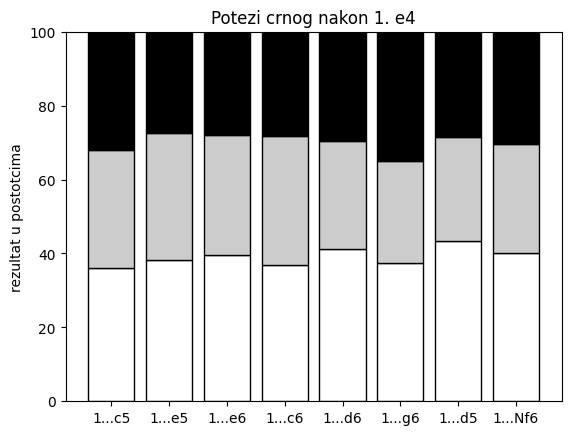

In [141]:
fig, ax = plt.subplots()
head=e4.head(8)

ax.set(ylim=(0, 100))

rezultat = {'bijeli': head['bijeli dobiva'],
            'remi': head['remi'],
            'crni': head['crni dobiva']}
colors = ['1', '0.8', '0']

bottom = np.zeros(8)
i=0
for boolean, rez in rezultat.items():
    bar = ax.bar(head['potez'], rez, label=boolean, bottom=bottom, color=colors[i], edgecolor='black')
    bottom += rez
    i+=1
ax.set_ylabel('rezultat u postotcima')
ax.set_title('Potezi crnog nakon 1. e4')

plt.show()

Najčešći odgovor crnog na e4, koji mu ujedno pruža dobre šanse za pobjedu, jest 1... c5. To je uvod u tzv. sicilijansku obranu, vrlo teorijski razvijeno otvaranje bogato varijantama i mogućnostima za napad za oba igrača. Glavna je Najdorfova varijanta nazvana po njenom tvorcu, argentinskom šahistu Miguelu Najdorfu.

In [179]:
def najdorf():
    pgn = io.StringIO("1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. Nc3 a6")
    game = chess.pgn.read_game(pgn)
    return game

In [180]:
board = chess.Board()
moves = moveList(najdorf())

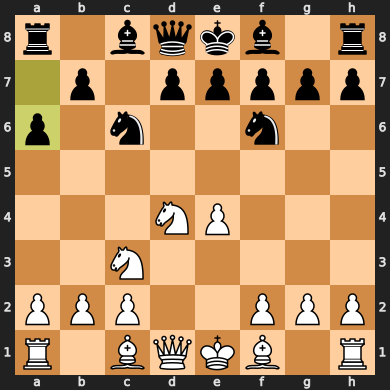

In [191]:
play(board,moves)

Crni igra c5 kako bi razmjenio svog c pješaka za centralnog d pješaka bijelog te tako oslabio kontrolu bijelog nad centrom. Nakon standardnog razvoja skakača slijedi na prvu pomalo neobičan Najdorfov potez a6. Njegov cilj je kontrola nad poljem b5, na koje bi inače mogao uskočiti jedan od bijelih skakača, te priprema za napredovanje crnim b pješakom (sa b7 na b5 i b4, gdje tjera bijelog skakača s c3).